In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier

In [2]:
fraud = pd.read_csv('Insurance Fraud.csv',na_values=["?"])

In [3]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
fraud.shape

(1000, 40)

In [7]:
fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
fraud['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [10]:
fraud['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [11]:
fraud['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [12]:
fraud['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [29]:
fraud['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [13]:
fraud['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [14]:
fraud['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [15]:
fraud['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [16]:
fraud.drop('_c39',axis=1,inplace=True)

In [17]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [18]:
fraud['police_report_available'].replace(['NO','YES'],[0,1],inplace = True)
fraud['police_report_available'].fillna(2,inplace=True)
fraud['property_damage'].replace(['NO','YES'],[0,1],inplace = True)
fraud['property_damage'].fillna(2,inplace=True)
fraud['collision_type'].replace(['Side Collision','Rear Collision','Front Collision'],[1,2,3],inplace=True)
fraud['collision_type'].fillna(0,inplace=True)
fraud['insured_sex'].replace(['MALE','FEMALE'],[1,0],inplace=True)
fraud['insured_education_level'].replace(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'],[5,4,2,3,0,1,2],inplace=True)

In [19]:
fraud['csl1'] = fraud['policy_csl'].str.split('/').str[0]
fraud['csl2'] = fraud['policy_csl'].str.split('/').str[1]
fraud['csl1'] = pd.to_numeric(fraud['csl1'],errors='coerce')
fraud['csl2'] = pd.to_numeric(fraud['csl2'],errors='coerce')

In [20]:
fraud["policy_day"] = pd.to_datetime(fraud.policy_bind_date,format='%d-%m-%Y').dt.day
fraud["policy_month"] = pd.to_datetime(fraud.policy_bind_date,format='%d-%m-%Y').dt.month
fraud["policy_year"] = pd.to_datetime(fraud.policy_bind_date,format='%d-%m-%Y').dt.year

In [21]:
fraud['vehicle_age'] = 2020-fraud['auto_year']

In [22]:
fraud['fraud_reported'].replace(['Y','N'],[1,0],inplace=True)

In [23]:
fraud.drop(['policy_number','policy_bind_date','policy_csl','auto_year','incident_location','incident_date','incident_hour_of_the_day','insured_zip'],axis=1,inplace=True)

In [24]:
fraud['insured_sex'].unique()

array([1, 0], dtype=int64)

In [25]:
fraud['insured_education_level'].unique()

array([5, 4, 2, 3, 0, 1], dtype=int64)

In [26]:
fraud

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,vehicle_claim,auto_make,auto_model,fraud_reported,csl1,csl2,policy_day,policy_month,policy_year,vehicle_age
0,328,48,OH,1000,1406.91,0,1,5,craft-repair,sleeping,...,52080,Saab,92x,1,250,500,17,10,2014,16
1,228,42,IN,2000,1197.22,5000000,1,5,machine-op-inspct,reading,...,3510,Mercedes,E400,1,250,500,27,6,2006,13
2,134,29,OH,2000,1413.14,5000000,0,4,sales,board-games,...,23100,Dodge,RAM,0,100,300,6,9,2000,13
3,256,41,IL,2000,1415.74,6000000,0,4,armed-forces,board-games,...,50720,Chevrolet,Tahoe,1,250,500,25,5,1990,6
4,228,44,IL,1000,1583.91,6000000,1,2,sales,board-games,...,4550,Accura,RSX,0,500,1000,6,6,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,0,3,craft-repair,paintball,...,61040,Honda,Accord,0,500,1000,16,7,1991,14
996,285,41,IL,1000,1436.79,0,0,4,prof-specialty,sleeping,...,72320,Volkswagen,Passat,0,100,300,5,1,2014,5
997,130,34,OH,500,1383.49,3000000,0,3,armed-forces,bungie-jumping,...,52500,Suburu,Impreza,0,250,500,17,2,2003,24
998,458,62,IL,2000,1356.92,5000000,1,2,handlers-cleaners,base-jumping,...,36540,Audi,A5,0,500,1000,18,11,2011,22


In [27]:
fraud.select_dtypes(include=['object']).columns

Index(['policy_state', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'auto_make',
       'auto_model'],
      dtype='object')

In [30]:
encode =['policy_state', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'auto_make',
       'auto_model']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in encode:
    fraud[i]=le.fit_transform(fraud[i].astype(str))


In [31]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                 float64
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                        int64
police_report_available        float64
total_claim_amount               int64
injury_claim             

In [33]:
fraud.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,vehicle_claim,auto_make,auto_model,fraud_reported,csl1,csl2,policy_day,policy_month,policy_year,vehicle_age
0,328,48,2,1000,1406.91,0,1,5,2,17,...,52080,10,1,1,250,500,17,10,2014,16
1,228,42,1,2000,1197.22,5000000,1,5,6,15,...,3510,8,12,1,250,500,27,6,2006,13
2,134,29,2,2000,1413.14,5000000,0,4,11,2,...,23100,4,30,0,100,300,6,9,2000,13
3,256,41,0,2000,1415.74,6000000,0,4,1,2,...,50720,3,34,1,250,500,25,5,1990,6
4,228,44,0,1000,1583.91,6000000,1,2,11,2,...,4550,0,31,0,500,1000,6,6,2014,11


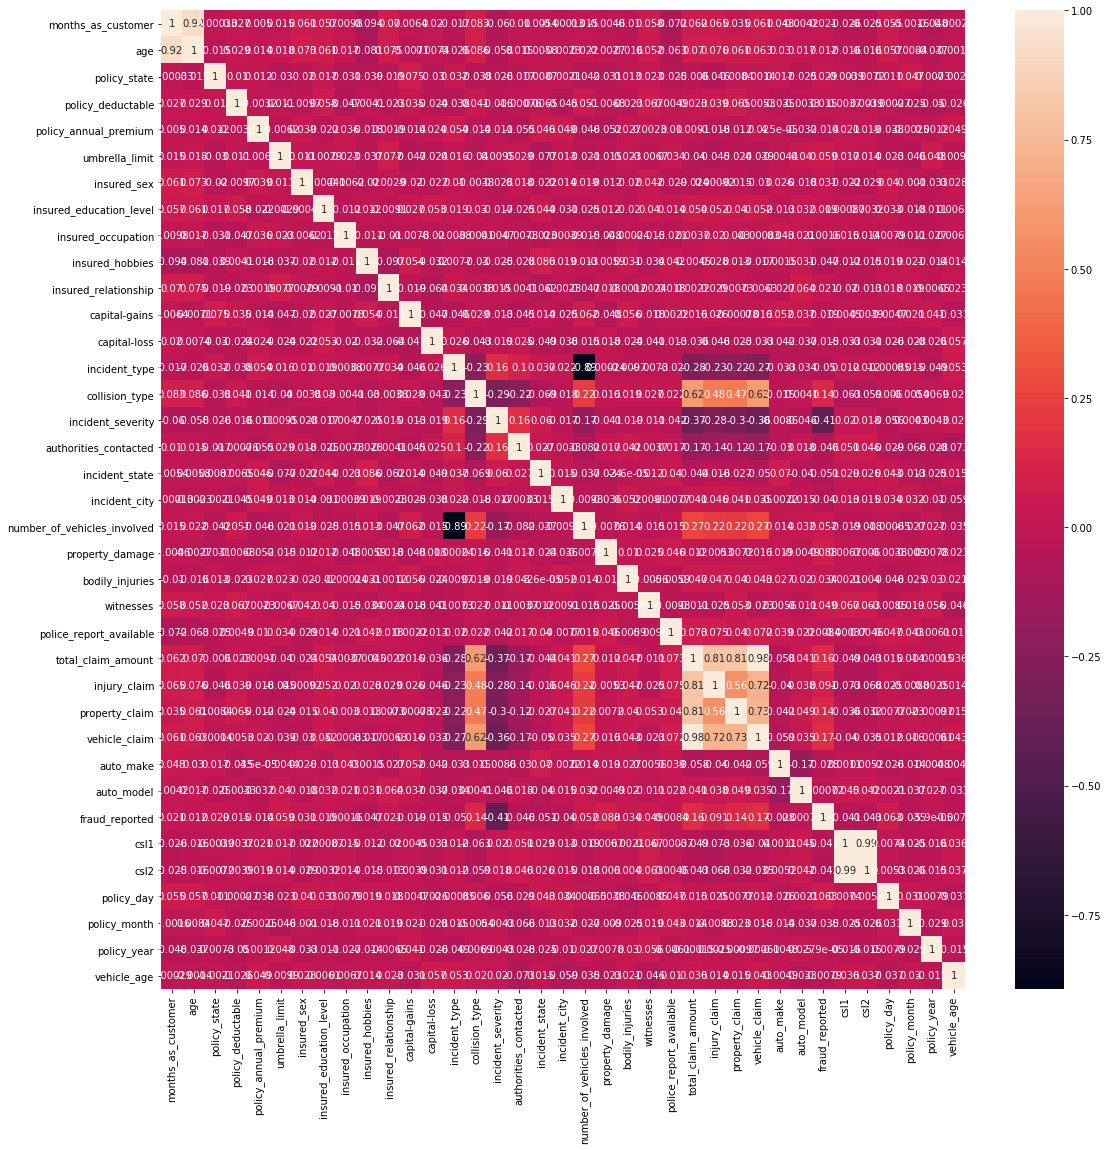

In [34]:
plt.figure(figsize=(18,18))
sns.heatmap(fraud.corr(),annot= True)   # not much correlaton among varaibles observed
plt.show()